<a href="https://colab.research.google.com/github/y-lims/DADS7203_Practical_NLP/blob/main/01_KPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Extraction (IE)

Information Extraction (IE) refers to the task of extracting relevant information from text documents with the goal of generating knowledge. It encompasses a wide range of tasks such as keyword/keyphrase extraction, named entity recognition, relation extraction, event extraction, and more.

## IE Applications


* News and Content Tagging: Tagging articles and media content.
* Chatbots: Extracting specific information from large data pools.
* Extracting data form forms and receipts: Use with OCR plays an important role in these apps e.g. feature to scan a check and deposit the money directly into user’s account

## IE Pipelines


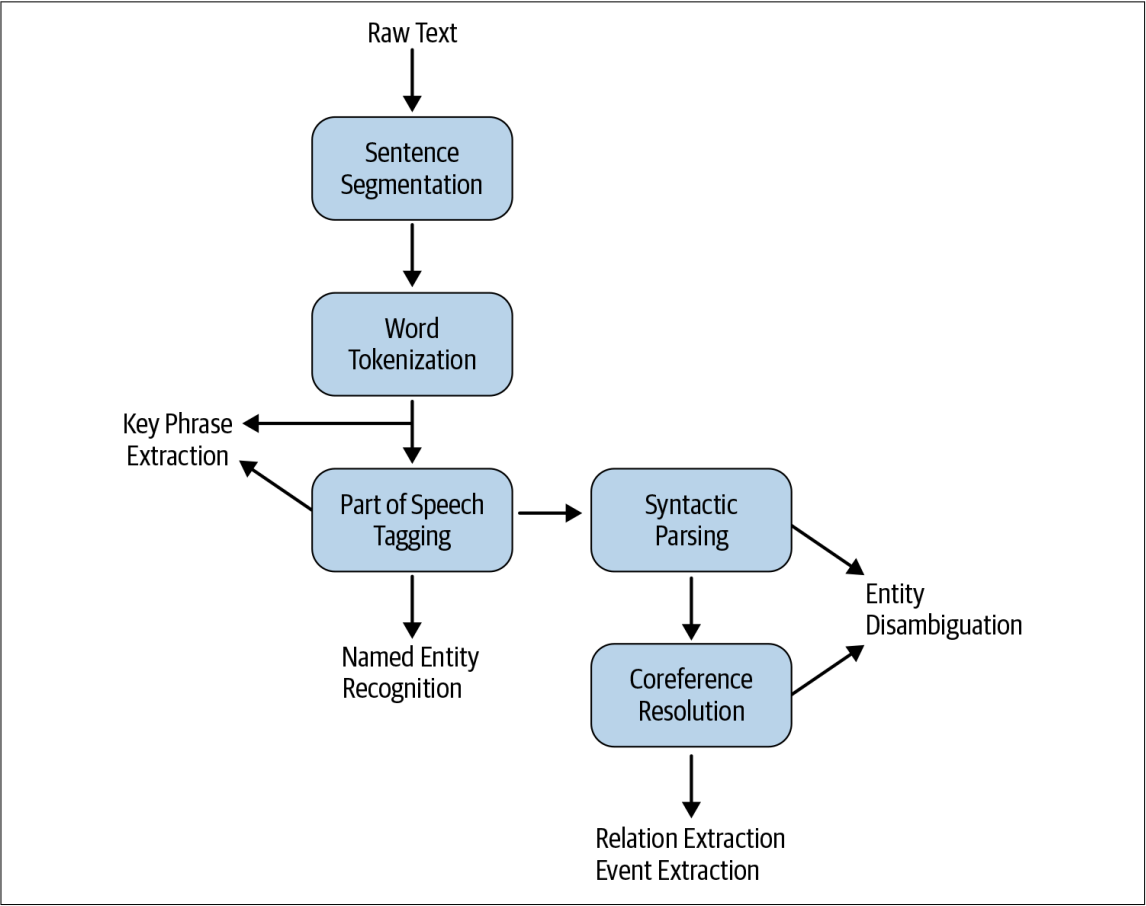

1. **Sentence Segmentation**: Breaks the raw text into individual sentences.
2. **Word Tokenization**: Further divides each sentence into individual words.
3. **Key Phrase Extraction**: Identifies the most important phrases or keywords within each sentence.
4. **Part-of-Speech Tagging**: Assigns grammatical categories (e.g., noun, verb, adjective) to each word.
5. **Syntactic Parsing**: Analyzes the grammatical structure of each sentence to understand the relationships between words.
6. **Named Entity Recognition (NER)**: Identifies specific entities within the text, such as names of people, organizations, places, dates, and times.
7. **Coreference Resolution**: Resolves references to the same entity that may appear in different parts of the text.
8. **Entity Disambiguation**: Clarifies the meaning of ambiguous entities (e.g., "Apple" could refer to a company or a fruit).
9. **Relation Extraction**: Identifies relationships between entities, such as "John works for Apple."
10. **Event Extraction**: Recognizes events described in the text, including their type, time, location, and participants.

# Import Library

In [1]:
#We need texacy, which inturn loads spacy library
# !pip install textacy==0.9.1

In [2]:
# !python -m spacy download en_core_web_sm

In [3]:
#Use spacy version 2.2.4 for this notebook
# !pip install spacy==3.7.2

In [4]:
# pip install --upgrade spacy textacy

## Spacy

In [5]:
import spacy

In [6]:
# import textacy.ke
# from textacy import *

import textacy.extract
from textacy import make_spacy_doc

In [7]:
#Load a spacy model, which will be used for all further processing.
en = textacy.load_spacy_lang("en_core_web_sm")

In [8]:
#Let us use a sample text file, nlphistory.txt, which is the text from the history section of Wikipedia's
#page on Natural Language Processing
#https://en.wikipedia.org/wiki/Natural_language_processing
try :
    from google.colab import files
    uploaded=files.upload()
    mytext = open('nlphistory.txt').read()

except ModuleNotFoundError :
    mytext = open('Data/nlphistory.txt').read()

Saving nlphistory.txt to nlphistory (1).txt


In [9]:
## Convert Text into a spacy document
doc = textacy.make_spacy_doc(mytext, lang=en)

## 1. TextRank

In [10]:
## Book Version
# textacy.ke.textrank(doc, topn=5)

## Revised Version
textacy.extract.keyterms.textrank(doc, topn=5)

[('successful natural language processing system', 0.024625341403960145),
 ('statistical machine translation system', 0.024508421175294396),
 ('natural language system', 0.020414310118706182),
 ('statistical natural language processing', 0.0184803120836678),
 ('natural language task', 0.015718423539873877)]

## 2. SGRank

In [11]:
## Book Version
# #Print the keywords using TextRank algorithm, as implemented in Textacy.
# print("Textrank output: ", [kps for kps, weights in textacy.ke.textrank(doc, normalize="lemma", topn=5)])\
# #Print the key words and phrases, using SGRank algorithm, as implemented in Textacy
# print("SGRank output: ", [kps for kps, weights in textacy.ke.sgrank(doc, topn=5)])


## Revised Version
#Print the keywords using TextRank algorithm, as implemented in Textacy.
print("Textrank output: ", [kps for kps, weights in textacy.extract.keyterms.textrank(doc, normalize="lemma", topn=5)])\
#Print the key words and phrases, using SGRank algorithm, as implemented in Textacy
print("SGRank output: ", [kps for kps, weights in textacy.extract.keyterms.sgrank(doc, topn=5)])

Textrank output:  ['successful natural language processing system', 'statistical machine translation system', 'natural language system', 'statistical natural language processing', 'natural language task']
SGRank output:  ['natural language processing system', 'statistical machine translation', 'early', 'research', 'late 1980']


In [12]:
#To address the issue of overlapping key phrases, textacy has a function: aggregage_term_variants.
#Choosing one of the grouped terms per item will give us a list of non-overlapping key phrases!
# terms = set([term for term,weight in textacy.ke.sgrank(doc)])
# print(textacy.ke.utils.aggregate_term_variants(terms))

from collections import defaultdict

def aggregate_term_variants(terms):
    term_dict = defaultdict(list)
    for term in terms:
        term_dict[term].append(term)  # Group by term
    return list(term_dict.keys())

# Assuming 'terms' is a set of terms extracted from the document
terms = set([term for term, weight in textacy.extract.keyterms.sgrank(doc)])

# Get non-overlapping key phrases
non_overlapping_terms = aggregate_term_variants(terms)

# Print results
print("Non-overlapping key phrases:", non_overlapping_terms)

Non-overlapping key phrases: ['real', 'natural language processing system', 'late 1980', 'research', 'world', 'example', 'ELIZA', 'early', 'statistical model', 'statistical machine translation']


## 3. Noun Chunks

In [13]:
#A way to look at key phrases is just consider all noun chunks as potential ones.
#However, keep in mind this will result in a lot of phrases, and no way to rank them!

print([chunk for chunk in textacy.extract.noun_chunks(doc)])

[history, natural language processing, 1950s, work, earlier periods, Alan Turing, article, "Intelligence, which, what, Turing test, criterion, intelligence, Georgetown experiment, fully automatic translation, more than sixty Russian sentences, English, authors, three or five years, machine translation, real progress, ALPAC report, which, ten-year-long research, expectations, funding, machine translation, Little further research, machine translation, late 1980s, first statistical machine translation systems, notably successful natural language processing systems, 1960s, natural language system, restricted "blocks worlds, restricted vocabularies, ELIZA, simulation, Rogerian psychotherapist, Joseph Weizenbaum, almost no information, human thought, emotion, ELIZA, startlingly human-like interaction, "patient, very small knowledge base, generic response, example, My head, you, your head, 1970s, many programmers, "conceptual ontologies, which, real-world information, computer-understandable 

In [14]:
# Print the keywords using TextRank algorithm
textrank_output = [kps for kps, weights in textacy.extract.keyterms.textrank(doc, normalize="lemma", topn=5)]
print("=== Textrank Output ===")
for index, kps in enumerate(textrank_output, start=1):
    print(f"{index}. {kps}")

# Print the key words and phrases using SGRank algorithm
sgrank_output = [kps for kps, weights in textacy.extract.keyterms.sgrank(doc, topn=5)]
print("\n=== SGRank Output ===")
for index, kps in enumerate(sgrank_output, start=1):
    print(f"{index}. {kps}")

# Print noun chunks
noun_chunks_output = [chunk.text for chunk in textacy.extract.noun_chunks(doc)]
print("\n=== Noun Chunks Output ===")
for index, chunk in enumerate(noun_chunks_output, start=1):
    print(f"{index}. {chunk}")

=== Textrank Output ===
1. successful natural language processing system
2. statistical machine translation system
3. natural language system
4. statistical natural language processing
5. natural language task

=== SGRank Output ===
1. natural language processing system
2. statistical machine translation
3. early
4. research
5. late 1980

=== Noun Chunks Output ===
1. history
2. natural language processing
3. 1950s
4. work
5. earlier periods
6. Alan Turing
7. article
8. "Intelligence
9. which
10. what
11. Turing test
12. criterion
13. intelligence
14. Georgetown experiment
15. fully automatic translation
16. more than sixty Russian sentences
17. English
18. authors
19. three or five years
20. machine translation
21. real progress
22. ALPAC report
23. which
24. ten-year-long research
25. expectations
26. funding
27. machine translation
28. Little further research
29. machine translation
30. late 1980s
31. first statistical machine translation systems
32. notably successful natural langu

Textacy also has a bunch of other information extraction functions, many of them based on regular expression patterns and heuristics to address extracting specific expressions such as acronyms and quotations. Apart from these, we can also extract matching custom regular expressions including POS tag patterns, or look for statements involving an entity, subject-verb-object tuples etc. We will discuss some of these as they come, in this chapter.

Documentation: https://chartbeat-labs.github.io/textacy/build/html/index.html